# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
Demo = pd.read_csv('CDemo.csv')
Demo.drop(columns=['Unnamed: 0'], inplace=True)
#Acho que essa coluna apareceu porque tentei abrir o csv no excel
Demo.mau = Demo.mau.astype(int)
Demo

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [9]:
Y = Demo.mau
X = Demo.drop('mau', axis=1)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

<IPython.core.display.Javascript object>


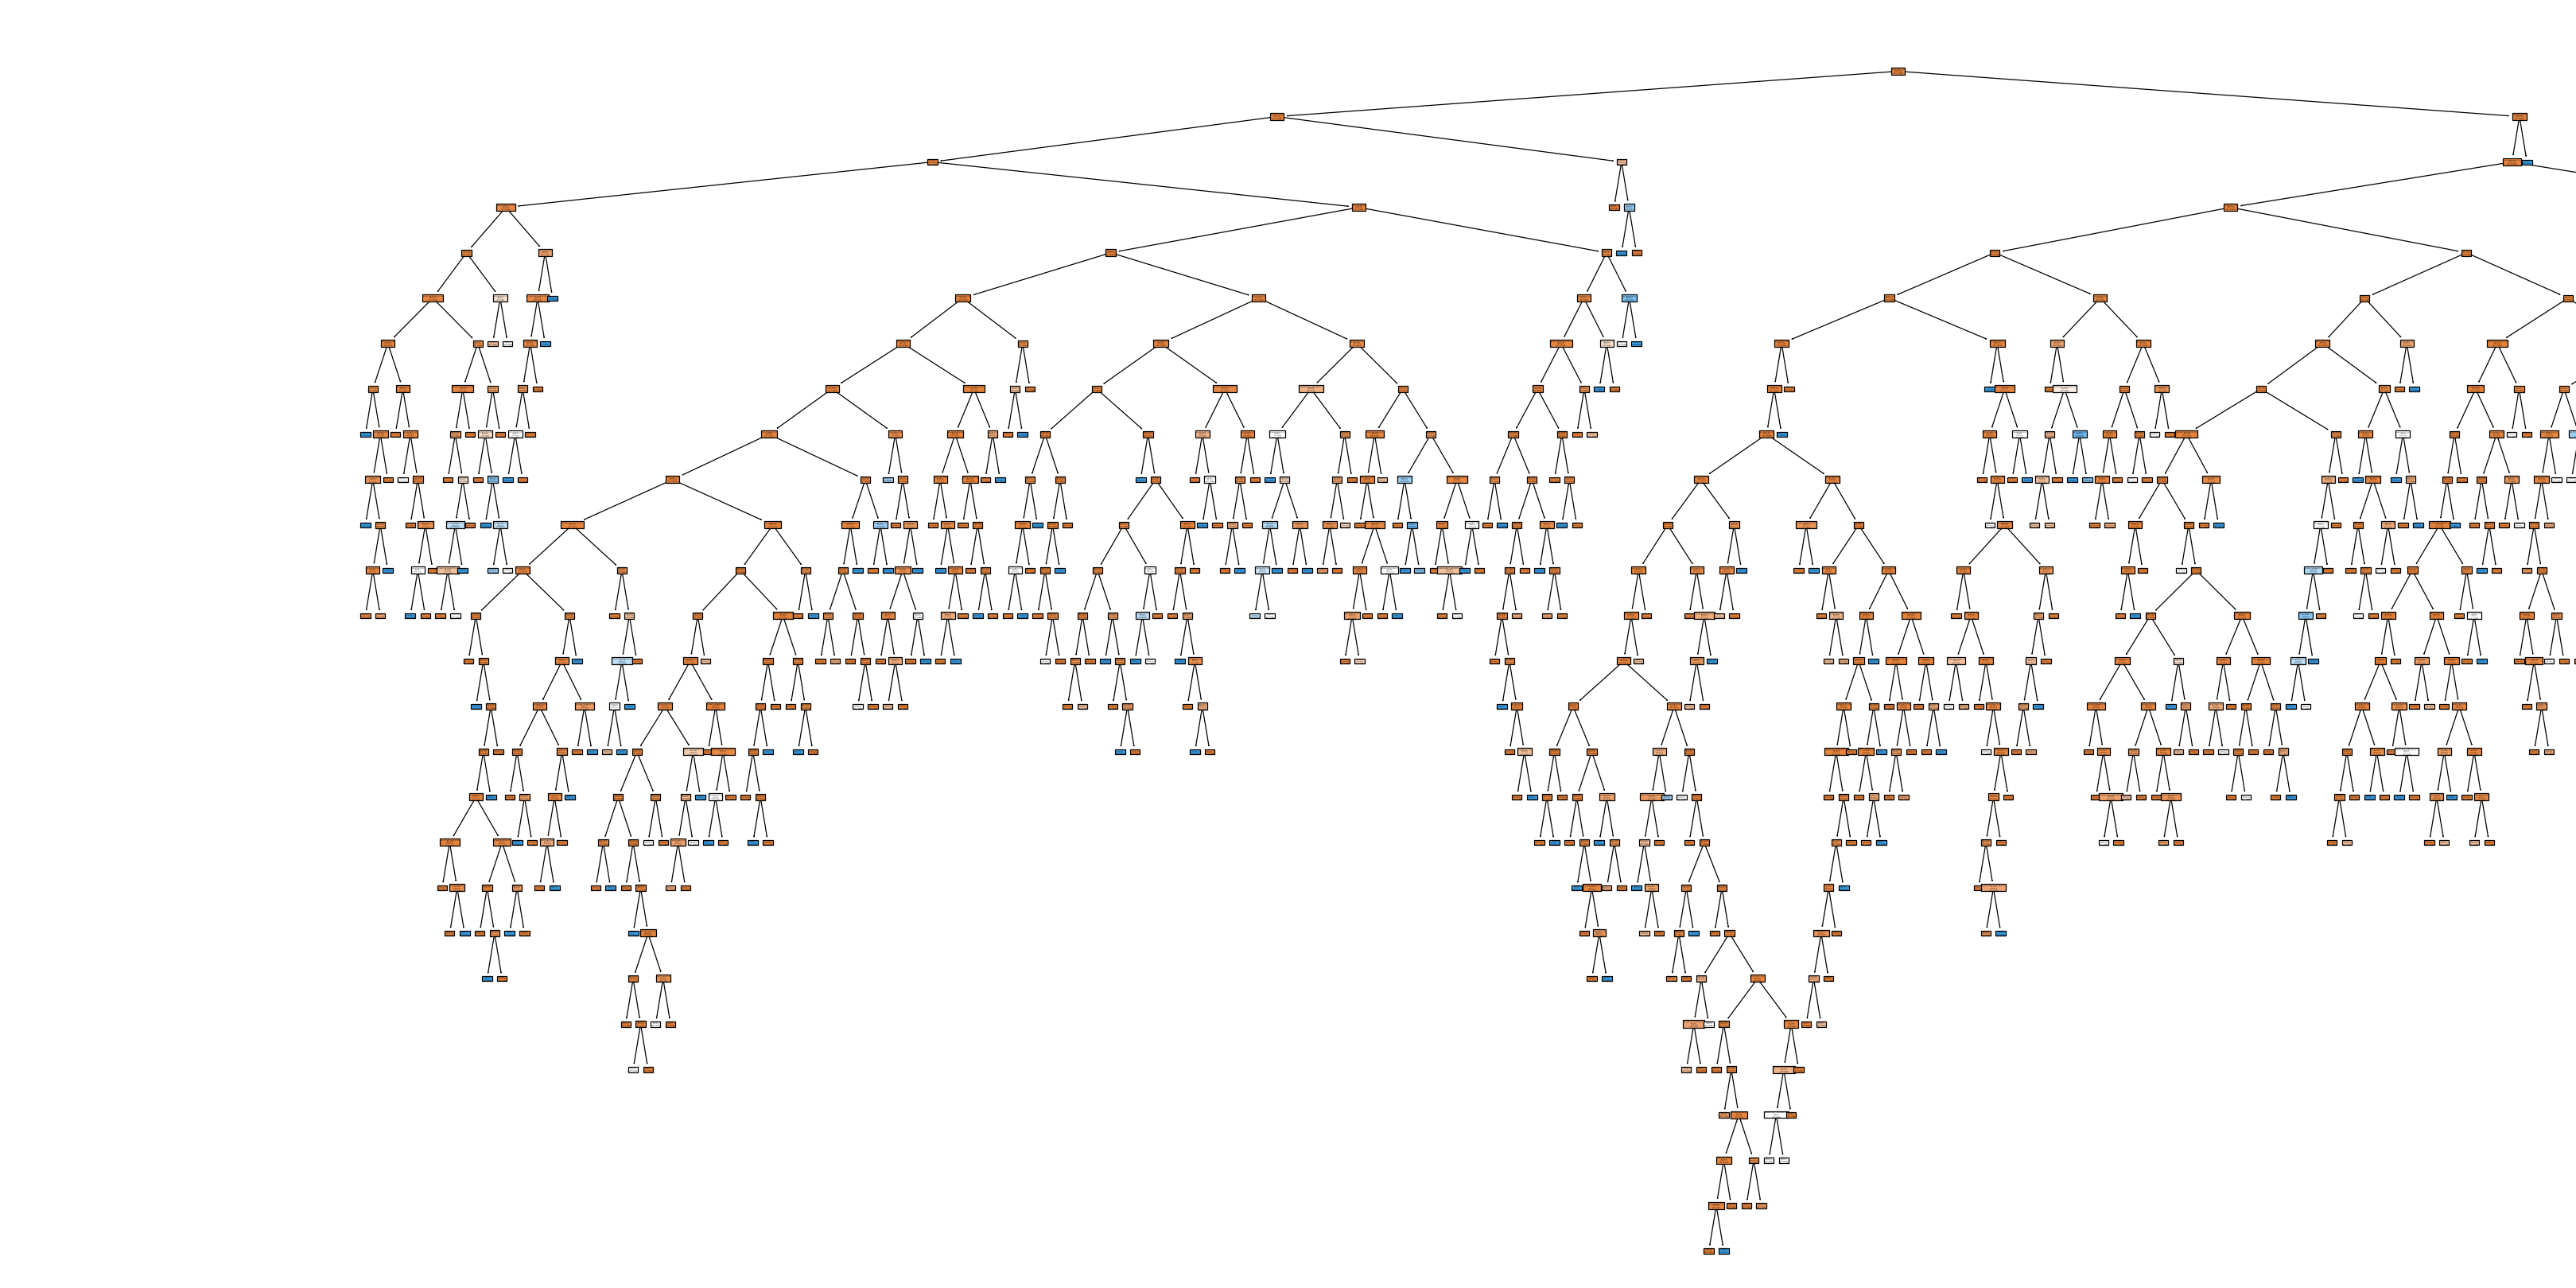

[Text(1936.70709688568, 1511.4814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(1155.5021055332734, 1454.4444444444443, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(722.1585683857035, 1397.4074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(185.98822859312705, 1340.3703703703704, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(136.5483197265996, 1283.3333333333333, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Aprovados'),
 Text(94.17125498386179, 1226.2962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Aprovados'),
 Text(37.668501993544716, 1169.2592592592591, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Aprovados'),


In [23]:
plt.figure(figsize=(40, 20))
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,Y_train)
plot_tree(clf, filled=True, class_names=['Aprovados','Reprovados'], feature_names=X.columns)
#Como posso fazer a árvore aparecer por completa sem precisar mover a figura para vê-la?

<IPython.core.display.Javascript object>


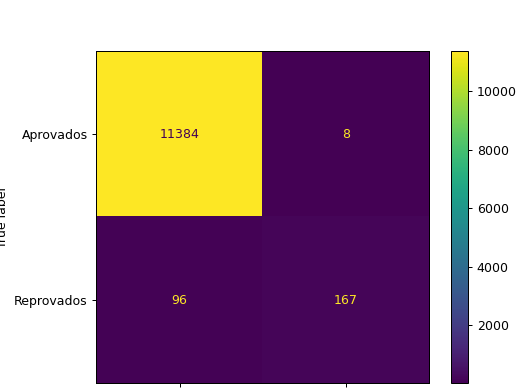

In [28]:
plot_confusion_matrix(clf, X_train, Y_train, display_labels=['Aprovados','Reprovados']);

In [29]:
y1 = clf.predict(X_train)
accuracy_score(Y_train, y1)
#Muitíssimo alta

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

<IPython.core.display.Javascript object>


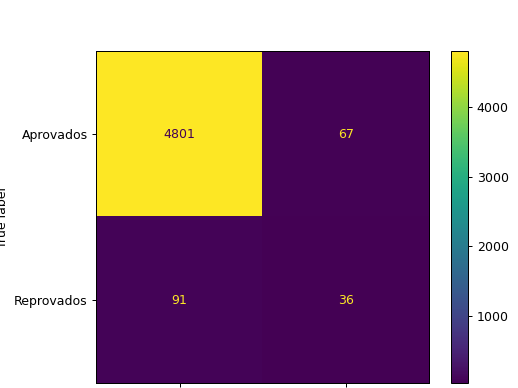

0.9683683683683684

In [31]:
plot_confusion_matrix(clf, X_test, Y_test, display_labels=['Aprovados','Reprovados']);
y2 = clf.predict(X_test)
accuracy_score(Y_test, y2)
#Ainda sim, muito alta

<IPython.core.display.Javascript object>


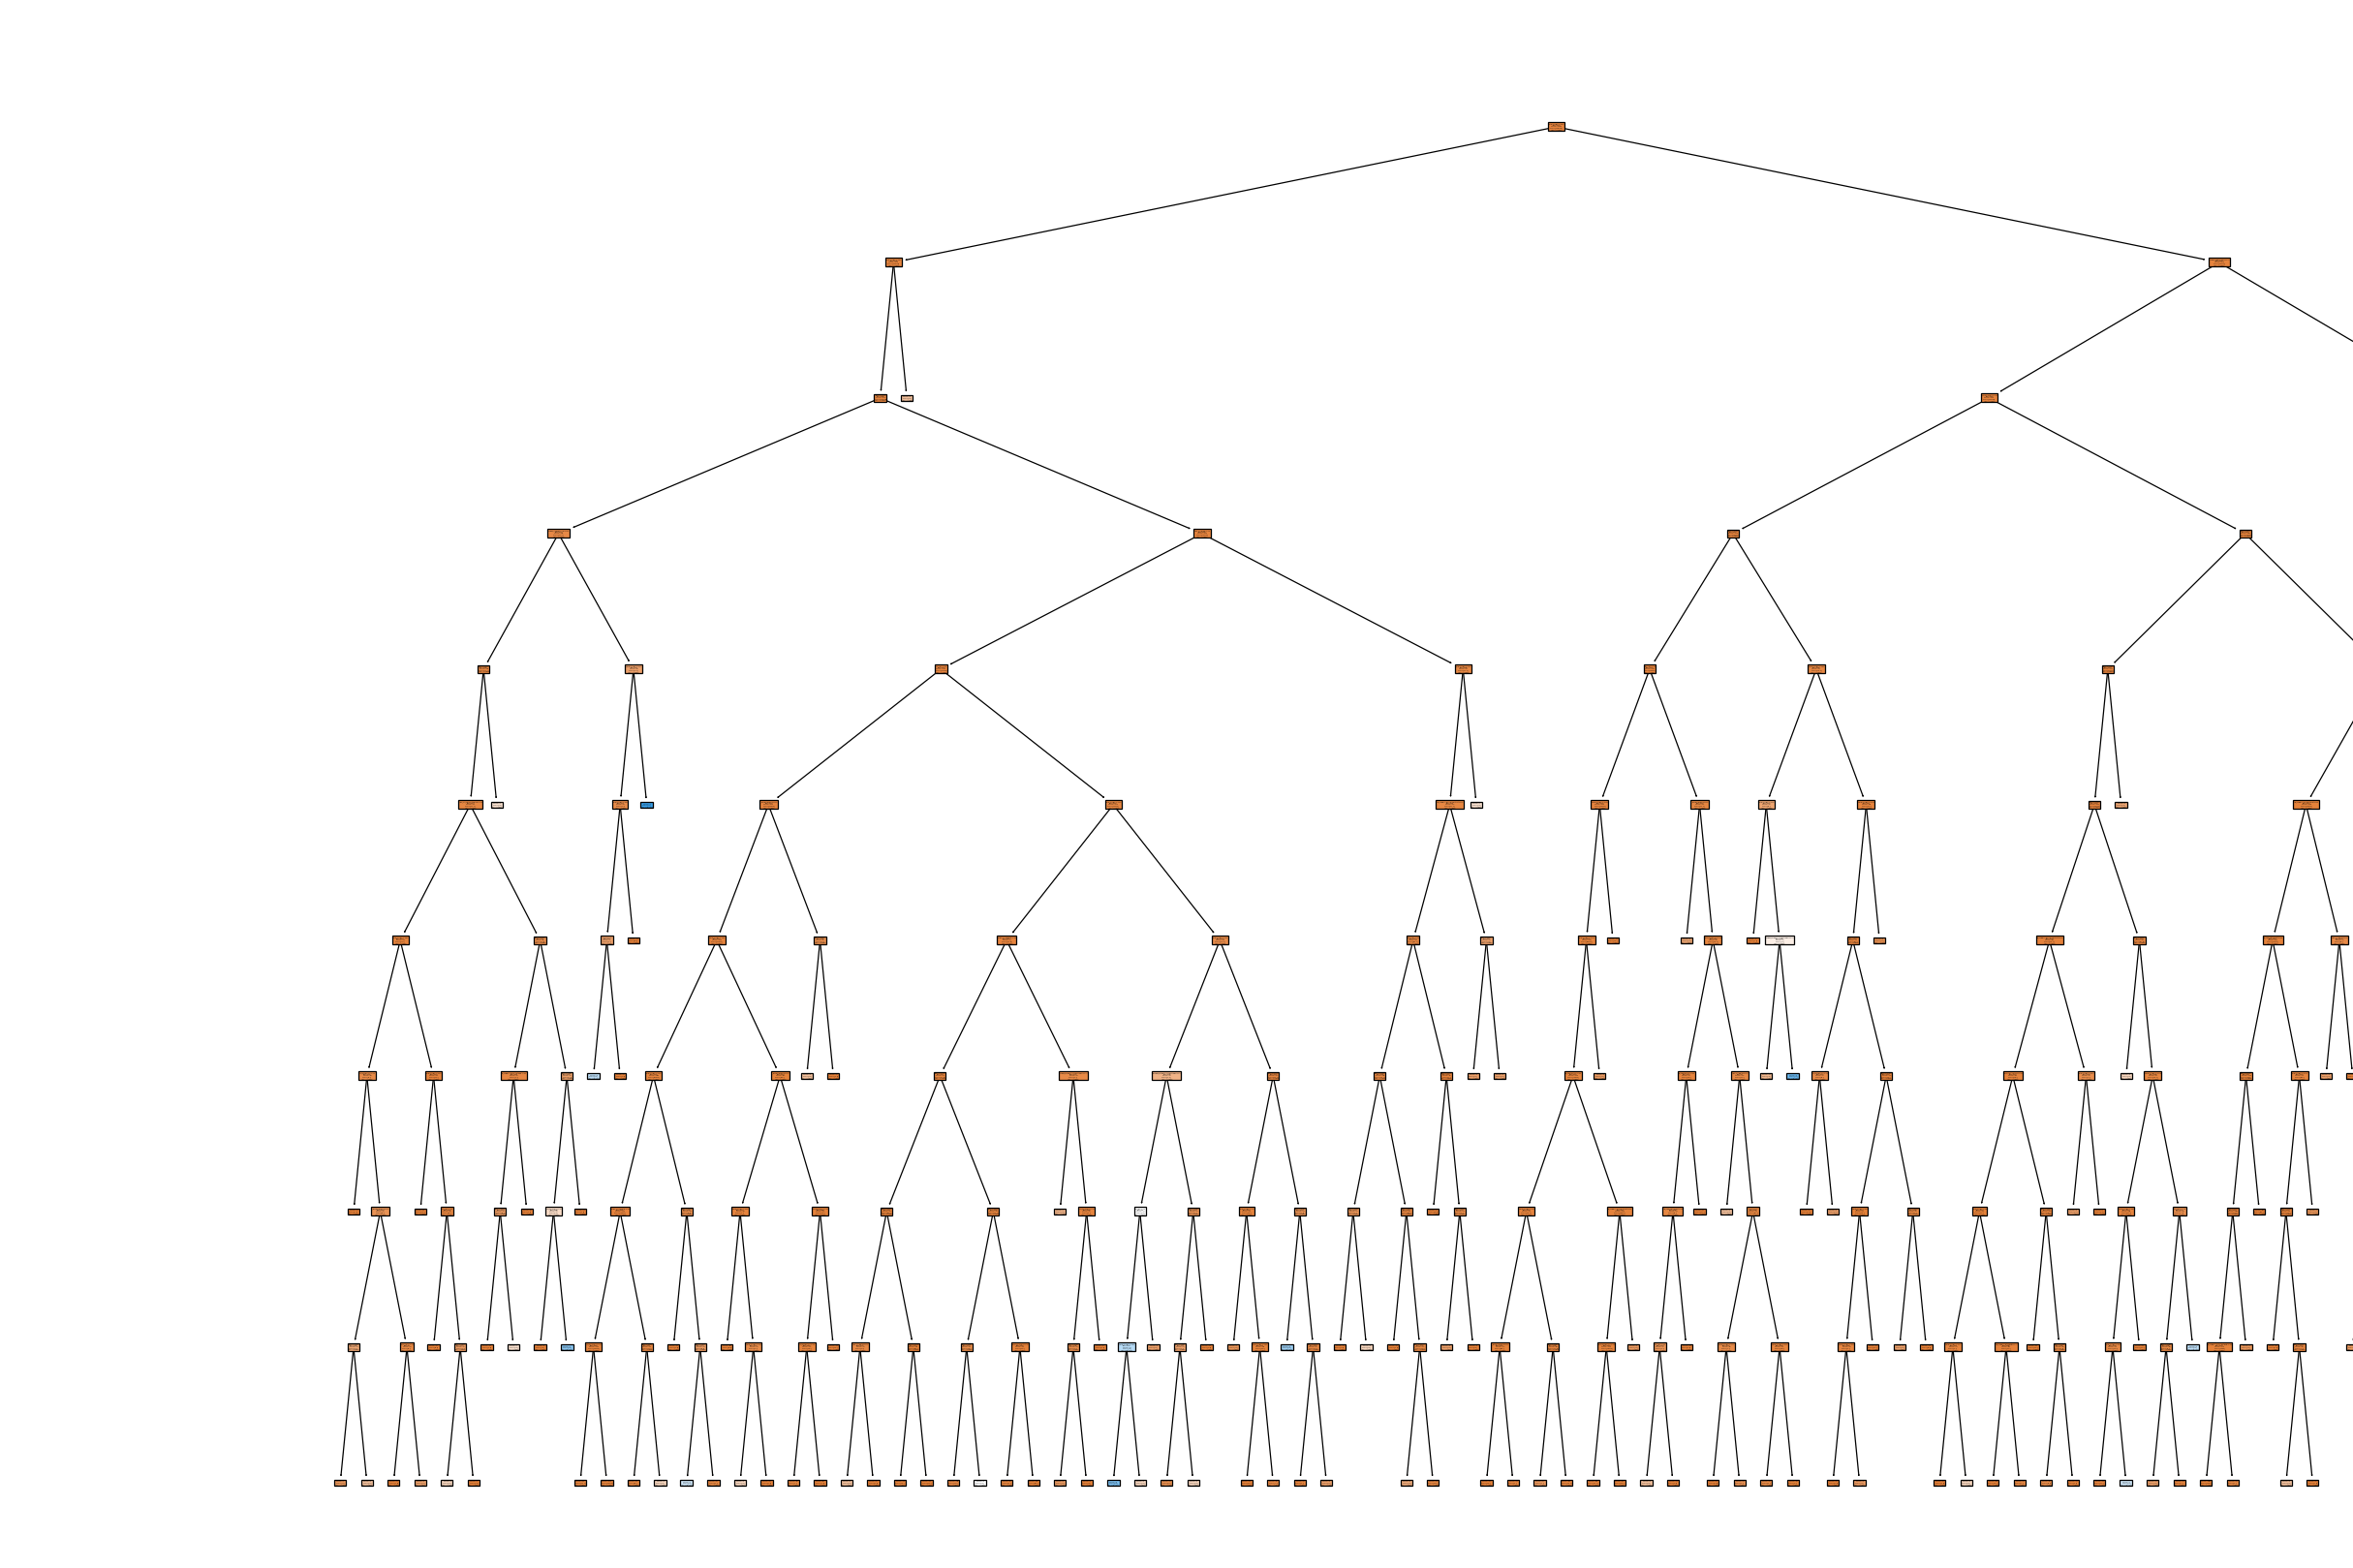

In [35]:
clf1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5 ,random_state=123) #Alguma razão específica para esse random state?
clf1 = clf1.fit(X_train,Y_train)

plt.figure(figsize=[30,20])
plot_tree(clf1,
         filled=True,
         class_names=['Aprovados','Reprovados'],
         feature_names=X_train.columns);

<IPython.core.display.Javascript object>


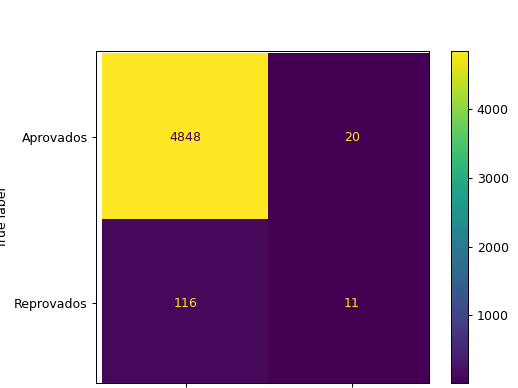

0.9727727727727727

In [38]:
plot_confusion_matrix(clf1, X_test, Y_test, display_labels=['Aprovados','Reprovados']);

predict1 = clf1.predict(X_test)
accuracy_score(Y_test, predict1)

In [41]:
(136/4859)*100
#2.7% são maus pagadores nessa base

2.798929820950813

In [ ]:
#A acurácia ficaria concentrada com o valor total dos testesao quadrante esquerdo superior se todos fossem 'bons'

In [42]:
clf2 = DecisionTreeClassifier(random_state=100)
path = clf2.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf2.fit(X_train, Y_train)
    clfs.append(clf2)

<IPython.core.display.Javascript object>


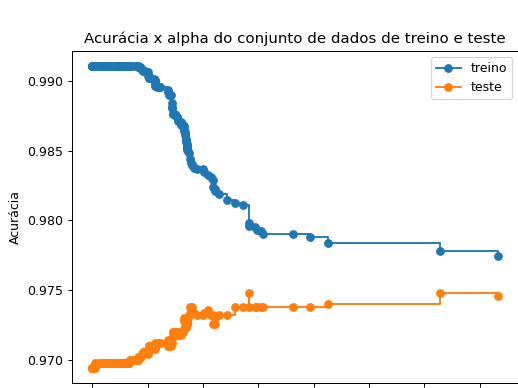

In [44]:
train_scores = [clf2.score(X_train, Y_train) for clf2 in clfs]
test_scores = [clf2.score(X_test, Y_test) for clf2 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()
#Queria ver como ficaria ao usar este método

In [47]:
pd.set_option('display.max_rows', None)
s = pd.DataFrame({'alpha':ccp_alphas.tolist(), 'score':test_scores})
s

,alpha,score
0,0.000000,0.969369
1,0.000000,0.969369
2,0.000000,0.969369
3,0.000000,0.969369
4,0.000002,0.969369
5,0.000002,0.969770
6,0.000006,0.969770
7,0.000006,0.969770
8,0.000008,0.969770
9,0.000008,0.969770


<IPython.core.display.Javascript object>


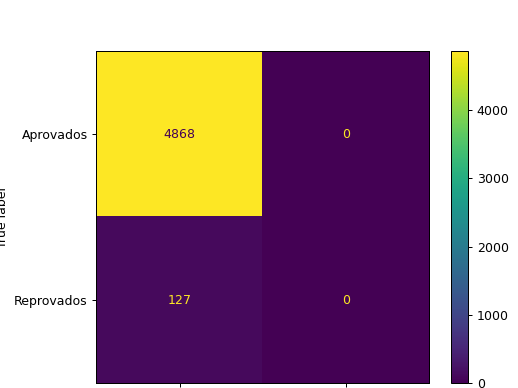

0.9745745745745745

In [48]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.973774)
clf_podada.fit(X_train, Y_train)
predict = clf_podada.predict(X_test)
plot_confusion_matrix(clf_podada, X_test, Y_test, display_labels=['Aprovados','Reprovados']);
accuracy_score(Y_test, predict)
#Ainda deu muito alta. O que poderia ser feito? E eu poderia confiar nesse resultado?

In [ ]:
#https://github.com/IlsF33/EBAC